In [1]:
## Loading required package: limma
library(limma)
library(RColorBrewer)
library(mixOmics)
library(ggplot2)
library(edgeR)
library(HTSFilter)
library(Matrix)
library(plyr)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(Rcpp)
library(dplyr)    # alternatively, this also loads %>%
# First reading the data
options(warn=-1)

#The root directory
dir="../counts"
setwd(dir)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.10.9
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Circular Exonic expression measure by bsj counts

 bsj counts provided by CIRIquant are simply the CCR reads

### Bovine

In [19]:
Data = read.table("2ind4CCR/bos_taurus_bsj_counts.tsv", header=T, sep="\t")

In [20]:
exonicCirc = Data[Data$circ_type=="intron",]
Counts = round(data.frame(exonicCirc[,-c(1,2,3)], row.names = exonicCirc[,1]))
pseudoCounts <- log2(Counts+1)

In [21]:
length(exonicCirc)

[1] 36

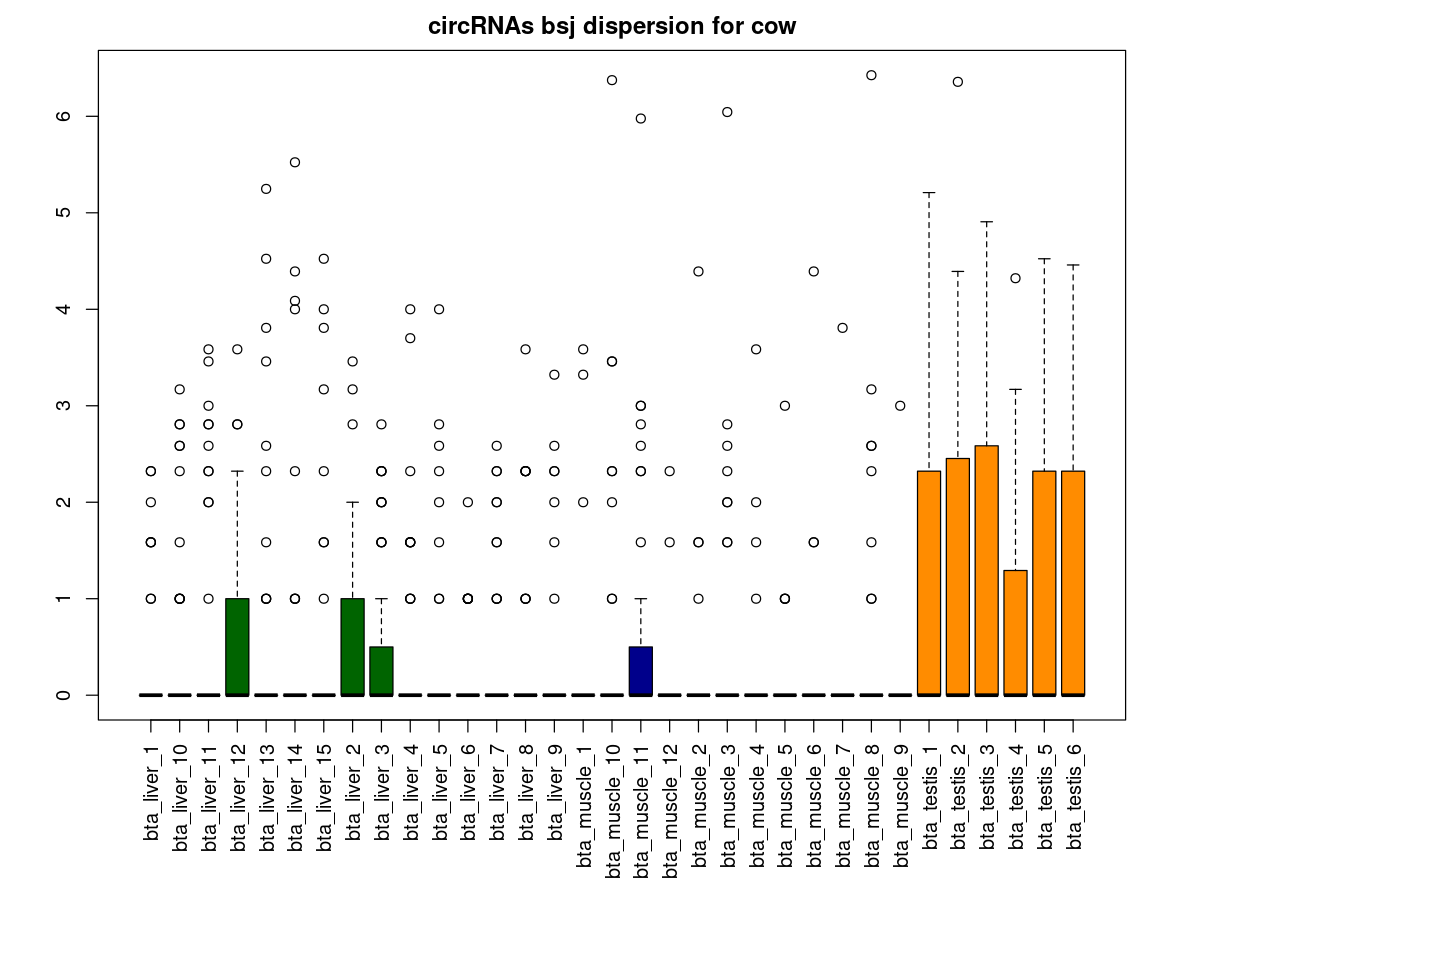

In [13]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="circRNAs bsj dispersion for cow")
par(xpd=TRUE)
legend(35, 11, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

#### Normalization

In [ ]:
dgeCounts <- DGEList(Counts)

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="Normalized circRNAs bsj dispersion for cow")
par(xpd=TRUE)
legend(35, 11, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
labels = c(rep("liver",15), rep("muscle",12), rep("testis", 6))
col = c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4, 2, 10))
par(xpd=FALSE)
plotMDS(pseudoNormCounts, label=labels, col=col)
title("exonic circRNA bsj cow MDS")
par(xpd=TRUE)
legend(3.5, 4, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

### Sheep

In [14]:
Data = read.table("2ind4CCR/ovis_aries_bsj_counts.tsv", header=T, sep="\t")

In [15]:
exonicCirc = Data[Data$circ_type=="intron",]
Counts = round(data.frame(exonicCirc[,-c(1,2,3)], row.names = exonicCirc[,1]))
pseudoCounts <- log2(Counts+1)

In [18]:
length(exonicCirc)

[1] 18

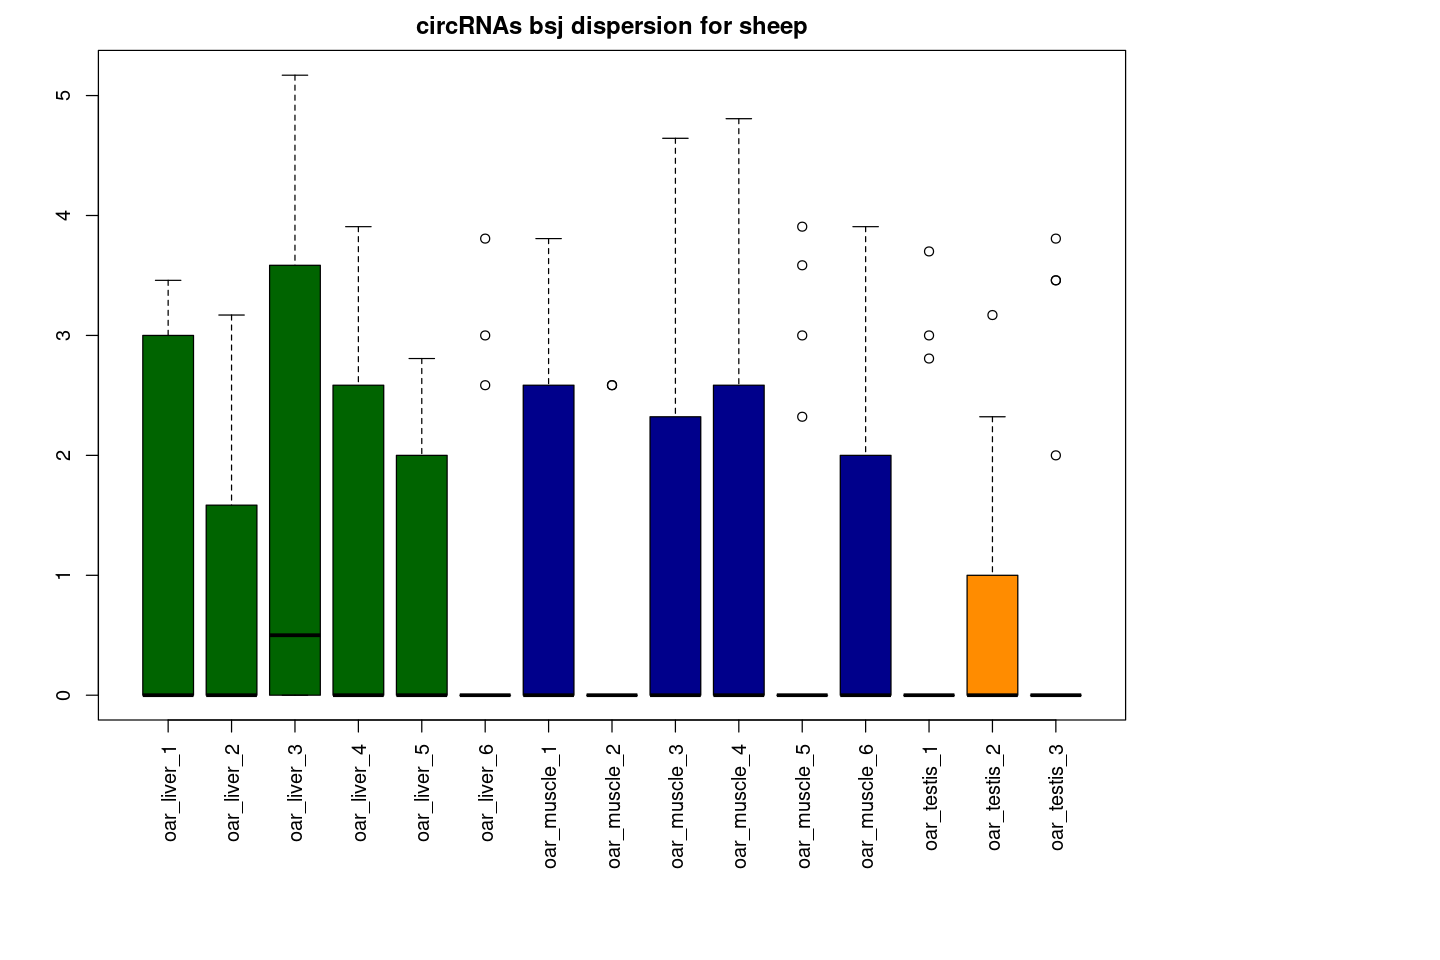

In [16]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 6), rep("darkblue", 6), rep("darkorange", 3))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="circRNAs bsj dispersion for sheep")
par(xpd=TRUE)
legend(16, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

#### Normalization

In [ ]:
dgeCounts <- DGEList(Counts)

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 6), rep("darkblue", 6), rep("darkorange", 3))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="circRNAs bsj dispersion for sheep")
par(xpd=TRUE)
legend(16, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
plotMDS(pseudoNormCounts)
title("Sheep exonic circRNA bsj MDS")

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
labels = c(rep("liver",6), rep("muscle",6), rep("testis", 3))
col = c(rep("darkgreen", 6), rep("darkblue", 6), rep("darkorange", 3))
par(mar=c(10, 4, 2, 13))
par(xpd=FALSE)
plotMDS(pseudoNormCounts, label=labels, col=col)
title("exonic circRNA bsj sheep MDS")
par(xpd=TRUE)
legend(3.5, 2, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

### Pig

In [36]:
Data = read.table("2ind4CCR/sus_scrofa_bsj_counts.tsv", header=T, sep="\t")

In [40]:
exonicCirc = Data[Data$circ_type=="exon",]
Counts = round(data.frame(exonicCirc[,-c(1,2,3)], row.names = exonicCirc[,1]))
pseudoCounts <- log2(Counts+1)

In [41]:
dim(exonicCirc)

[1] 11909    27

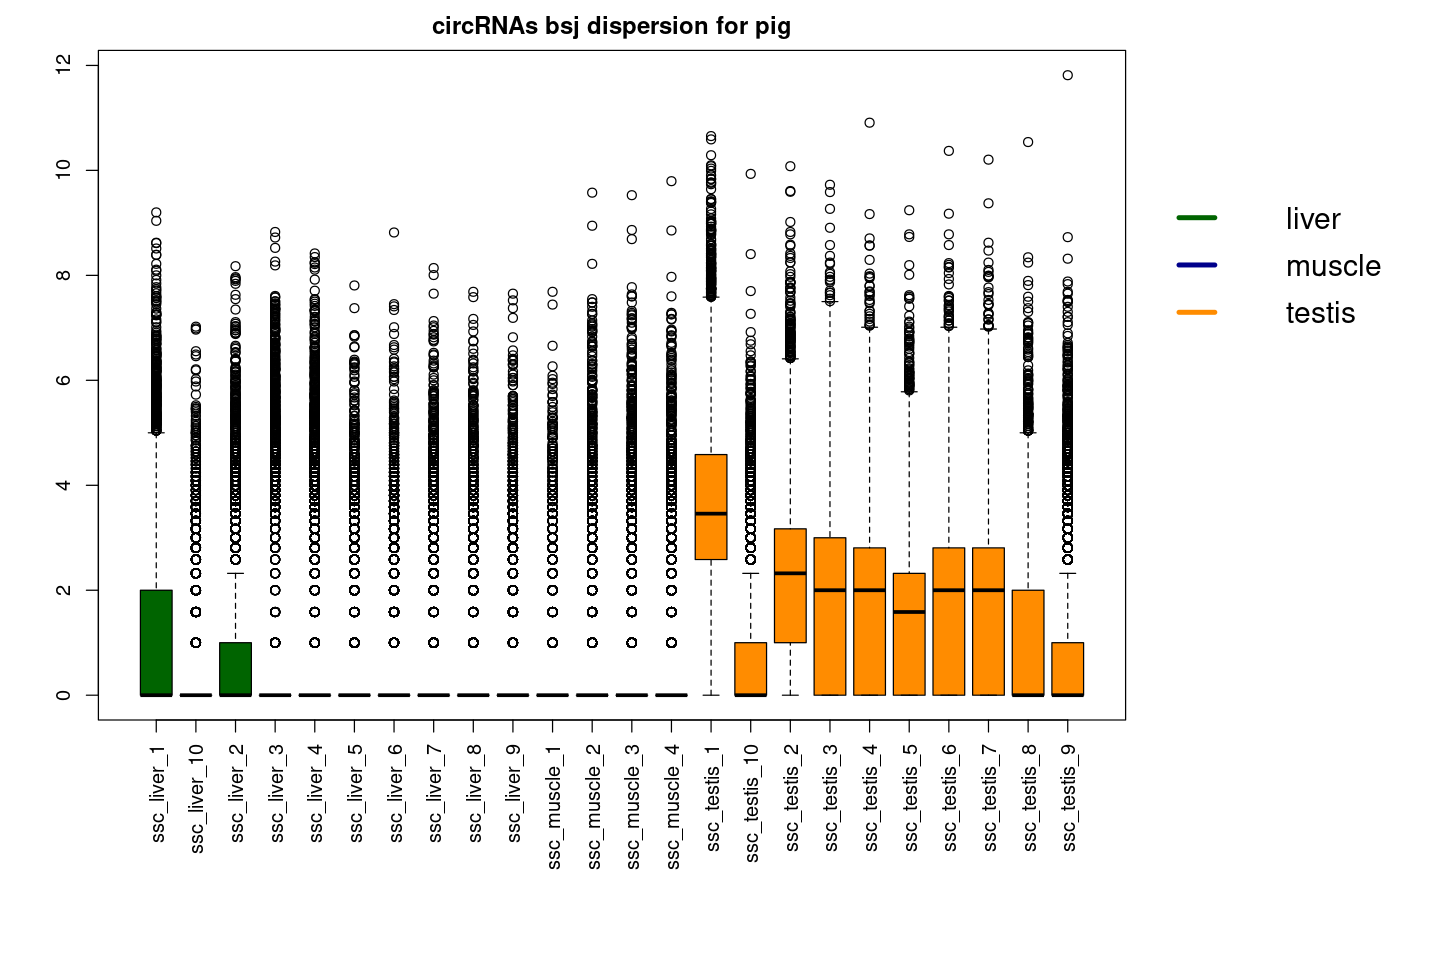

In [42]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 10), rep("darkblue", 4), rep("darkorange", 10))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="circRNAs bsj dispersion for pig")
par(xpd=TRUE)
legend(25, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

#### Normalization

In [32]:
dgeCounts <- DGEList(Counts)

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

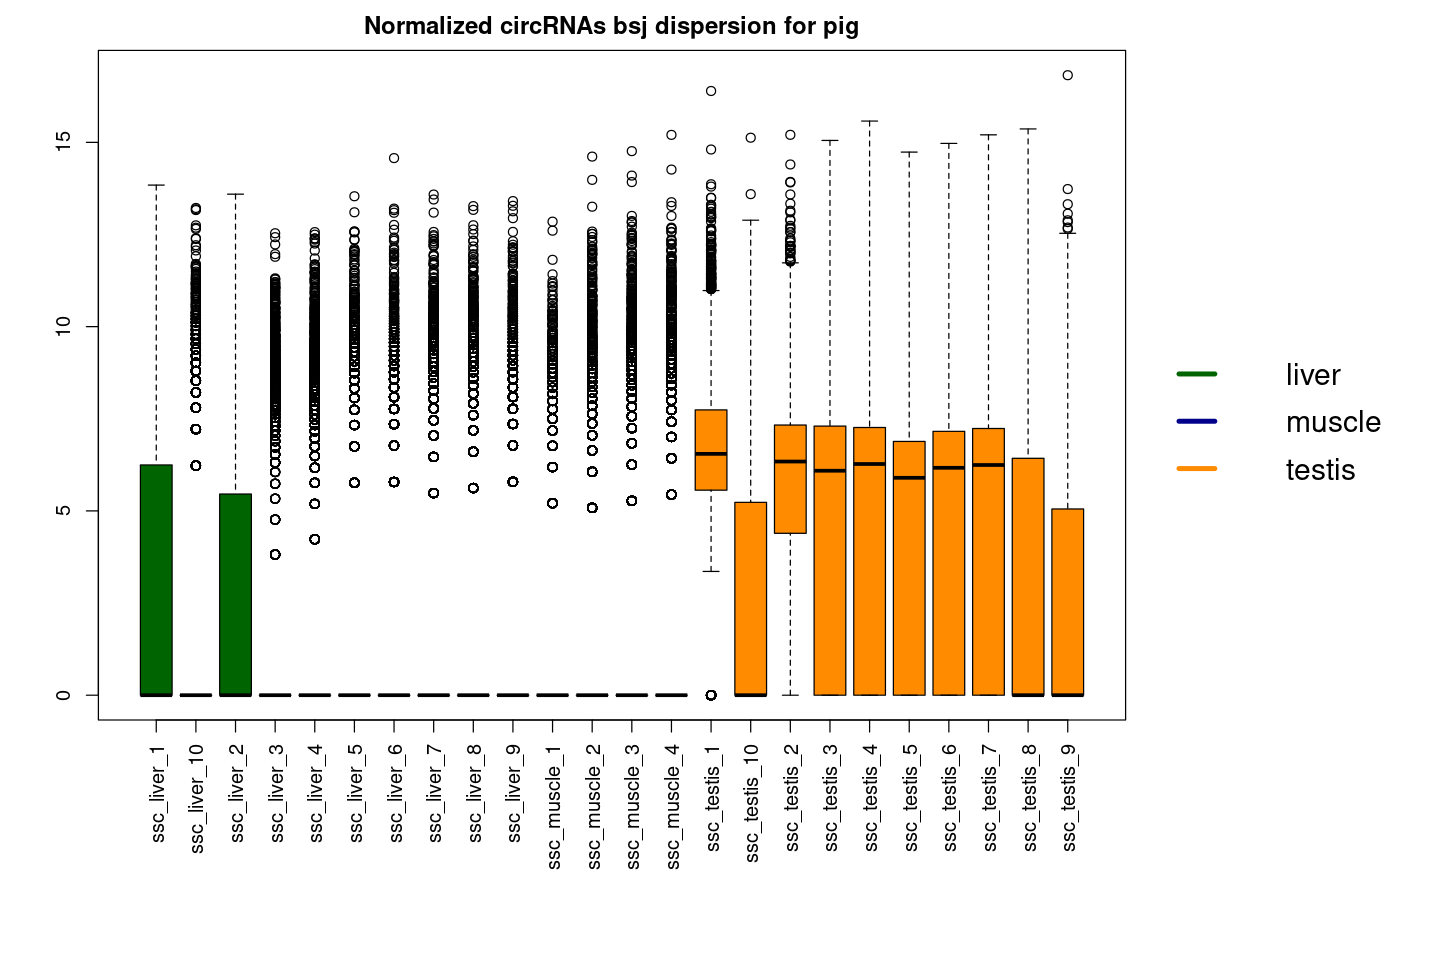

In [33]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 10), rep("darkblue", 4), rep("darkorange", 10))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="Normalized circRNAs bsj dispersion for pig")
par(xpd=TRUE)
legend(25, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

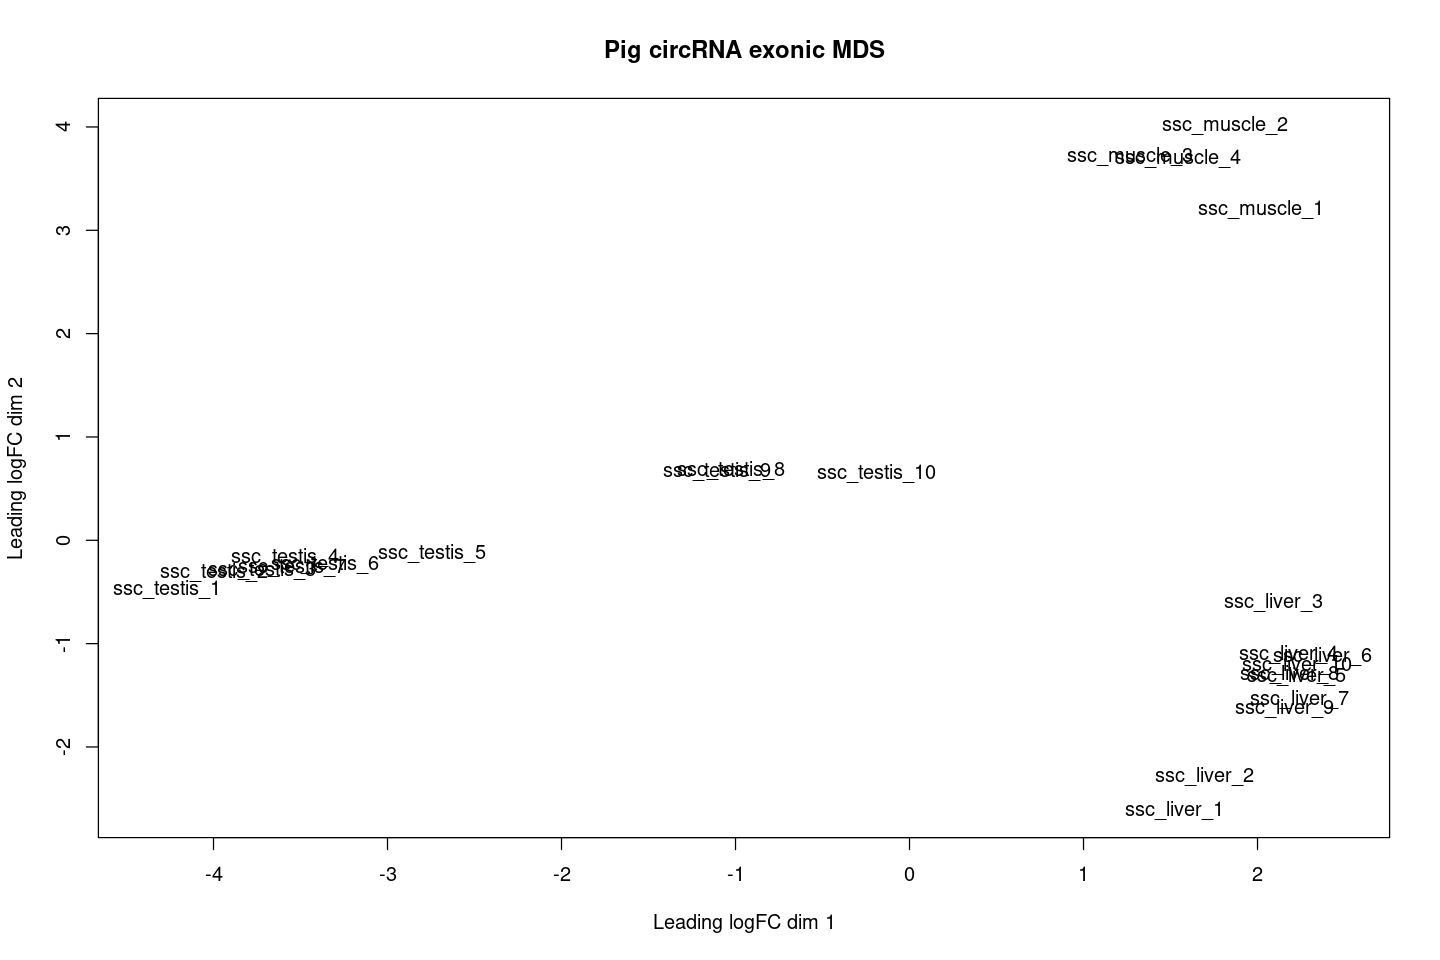

In [35]:
plotMDS(pseudoNormCounts)
title("Pig circRNA exonic MDS")

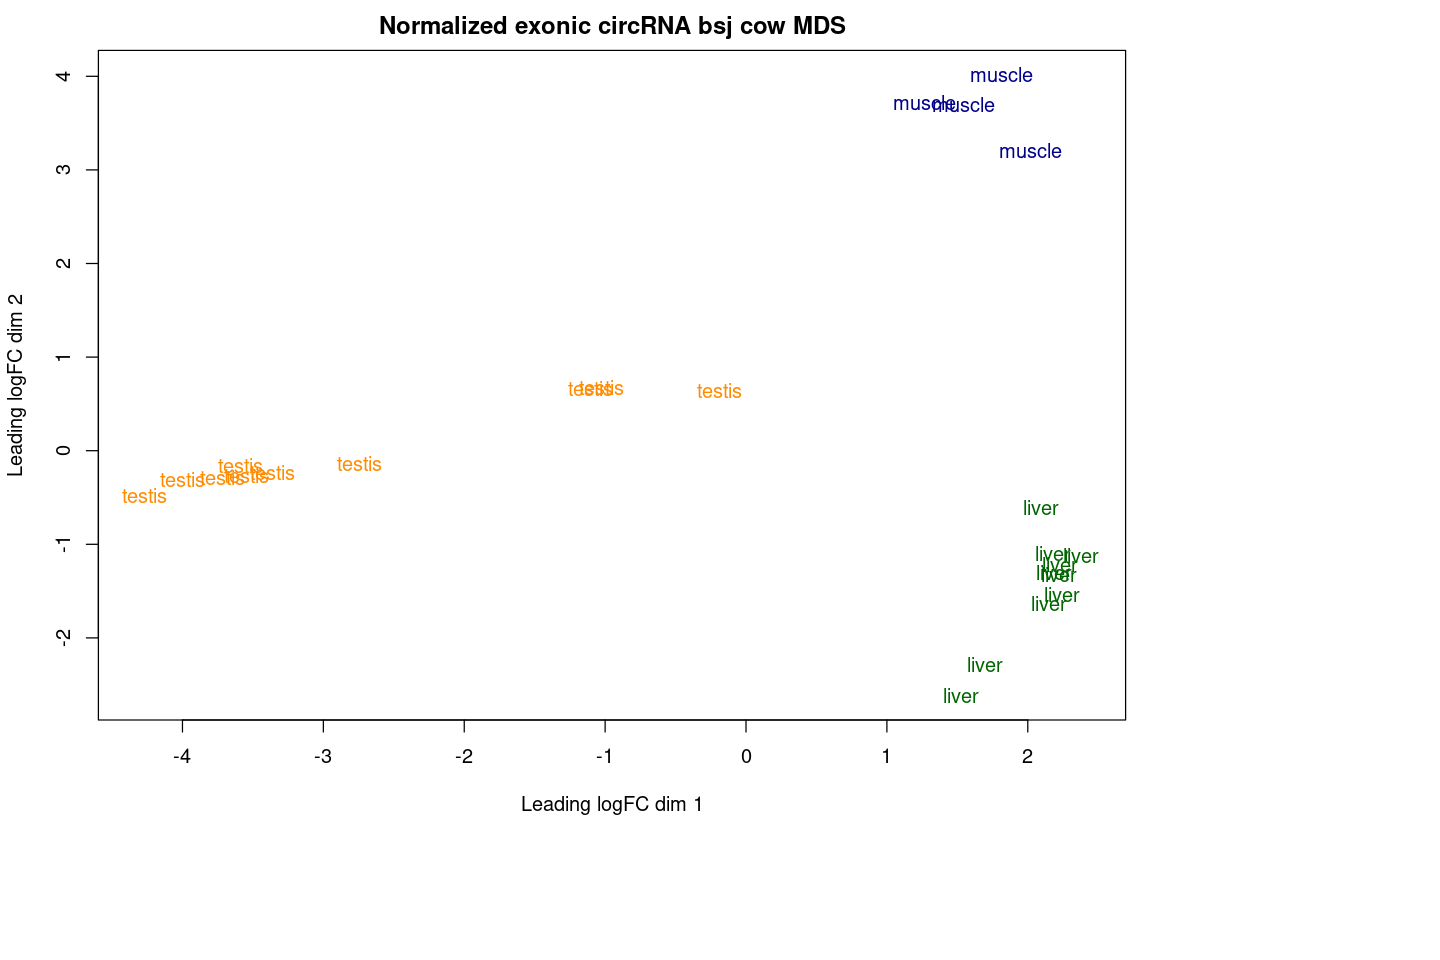

In [34]:
options(repr.plot.width=12, repr.plot.height=8)
labels = c(rep("liver",10), rep("muscle",4), rep("testis", 10))
col = c(rep("darkgreen", 10), rep("darkblue", 4), rep("darkorange", 10))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
plotMDS(pseudoNormCounts, label=labels, col=col)
title("Normalized exonic circRNA bsj cow MDS")
par(xpd=TRUE)
legend(4.6, 2, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)